Shape of data: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin       

/tmp/ipython-input-3565967194.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3565967194.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

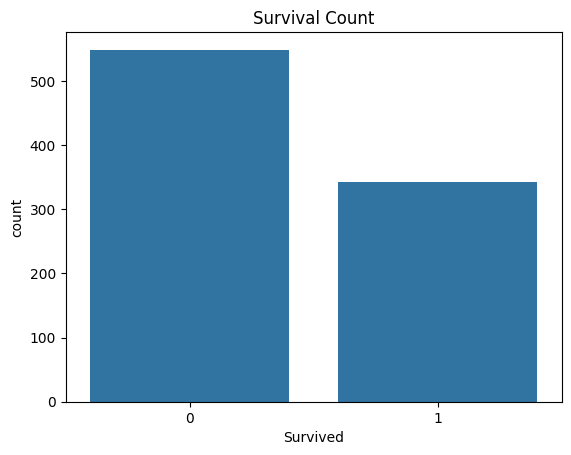

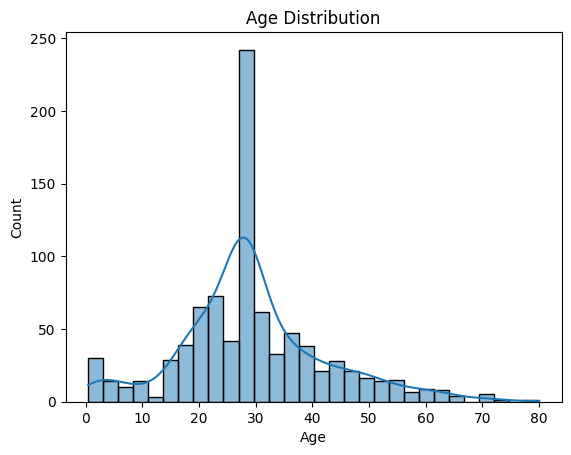

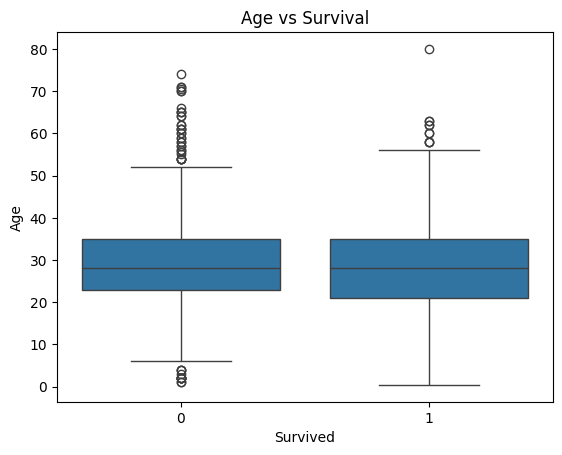

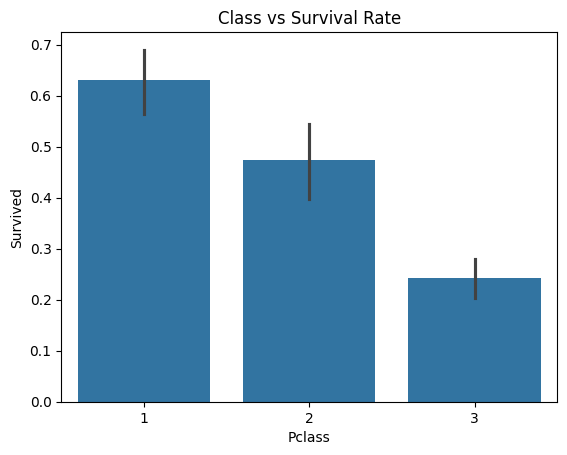

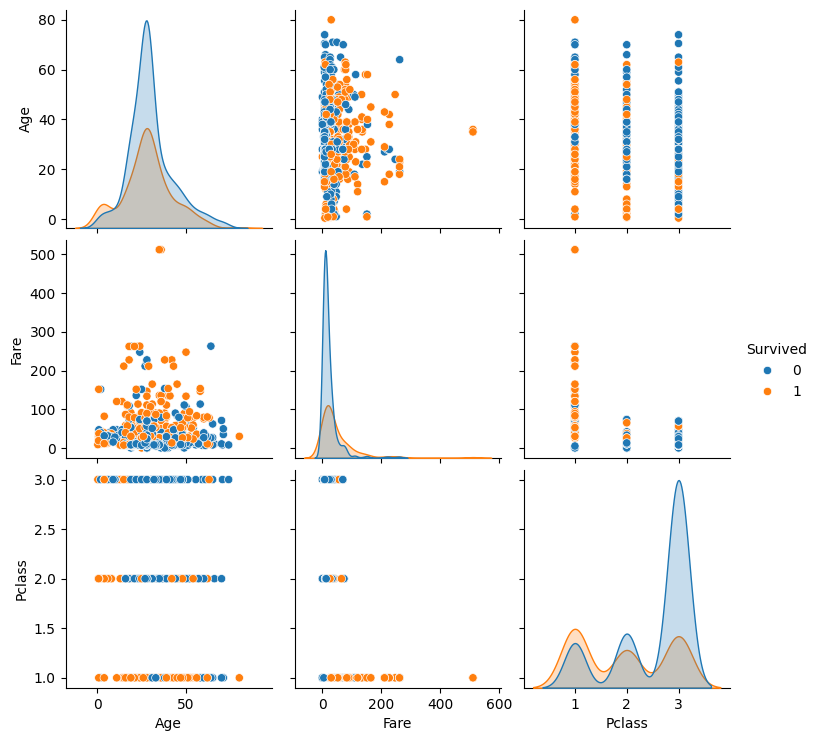

<Figure size 800x500 with 0 Axes>

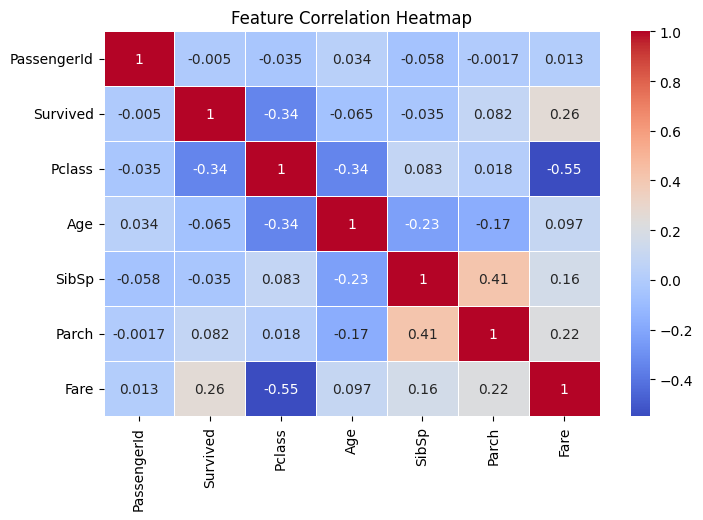

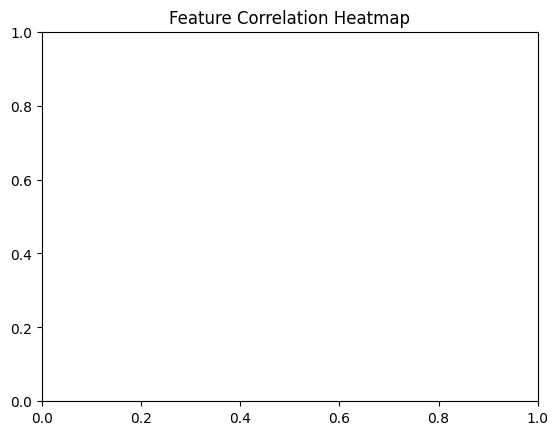


🔍 EDA Insights:
1️ Passengers in 1st class had higher survival chances.
2️ Women and children (younger age) survived more often.
3 Higher fare correlated with better survival odds.
4️ Age distribution was right-skewed.
5️ Cabin feature dropped due to high missing values.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv("titanic.csv")

# Basic Info
print("Shape of data:", df.shape)
df.info()
df.describe()

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Fill missing Age with median, Embarked with mode
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

# Basic Analysis
print("\nSurvival Rate:")
print(df['Survived'].value_counts(normalize=True))

# Univariate Analysis
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Bivariate Analysis
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Class vs Survival Rate')
plt.show()

# Multivariate Analysis
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,5))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

plt.title('Feature Correlation Heatmap')
plt.show()
print("""
🔍 EDA Insights:
1️ Passengers in 1st class had higher survival chances.
2️ Women and children (younger age) survived more often.
3 Higher fare correlated with better survival odds.
4️ Age distribution was right-skewed.
5️ Cabin feature dropped due to high missing values.
""")